<a href="https://colab.research.google.com/github/sandraliz/Covid-19-Analysis/blob/main/Day_8_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from google.colab import files 

import seaborn as sns


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 

In [3]:
uploaded = files.upload()

Saving covid_19_india-nov.csv to covid_19_india-nov.csv


In [4]:
df = pd.read_csv('covid_19_india-nov.csv') 
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [5]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%y')
confirmed_total_date = df.groupby('Date', as_index=False).agg({'Confirmed':'sum'})
fatalities_total_date = df.groupby('Date', as_index=False).agg({'Deaths':'sum'})
#total_date = confirmed_total_date.join(fatalities_total_date)
#total_date
confirmed_total_date

,Date,Confirmed
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3
...,...,...
287,2020-11-12,8683916
288,2020-11-13,8728795
289,2020-11-14,8773479
290,2020-11-15,8814579


In [6]:
confirmed_total_date['Time'] = np.arange(0,len(confirmed_total_date),1)
confirmed_total_date

,Date,Confirmed,Time
0,2020-01-30,1,0
1,2020-01-31,1,1
2,2020-02-01,2,2
3,2020-02-02,3,3
4,2020-02-03,3,4
...,...,...,...
287,2020-11-12,8683916,287
288,2020-11-13,8728795,288
289,2020-11-14,8773479,289
290,2020-11-15,8814579,290


In [7]:
X = confirmed_total_date['Time'].values.reshape(-1,1)
y = confirmed_total_date['Confirmed'].values.reshape(-1,1)

The linear model is: Y = -2.2148e+06 + 3.0254e+04X


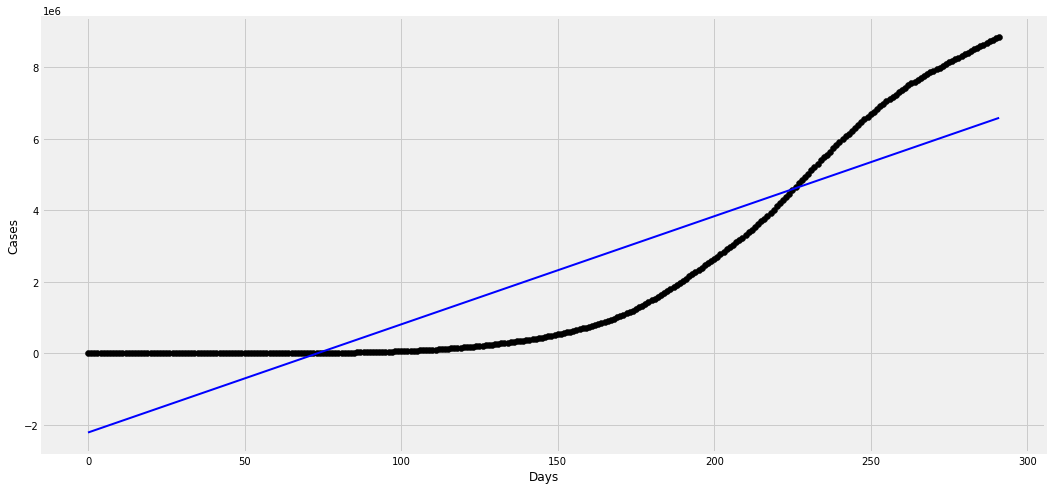

In [8]:
reg = LinearRegression()
reg.fit(X, y)
predictions = reg.predict(X)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='black'
)
plt.plot(
    X,
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Days")
plt.ylabel("Cases")
plt.show()

# Machine learning

In [9]:
confirmed_total_date["LogConfirmed"] = np.log(confirmed_total_date.Confirmed)
print(confirmed_total_date)

          Date  Confirmed  Time  LogConfirmed
0   2020-01-30          1     0      0.000000
1   2020-01-31          1     1      0.000000
2   2020-02-01          2     2      0.693147
3   2020-02-02          3     3      1.098612
4   2020-02-03          3     4      1.098612
..         ...        ...   ...           ...
287 2020-11-12    8683916   287     15.976983
288 2020-11-13    8728795   288     15.982138
289 2020-11-14    8773479   289     15.987244
290 2020-11-15    8814579   290     15.991918
291 2020-11-16    8845127   291     15.995377

[292 rows x 4 columns]


In [10]:
y1 = confirmed_total_date.Confirmed
y2 = confirmed_total_date.LogConfirmed
y1

0            1
1            1
2            2
3            3
4            3
        ...   
287    8683916
288    8728795
289    8773479
290    8814579
291    8845127
Name: Confirmed, Length: 292, dtype: int64

Text(0, 0.5, 'Log ConfirmedCases')

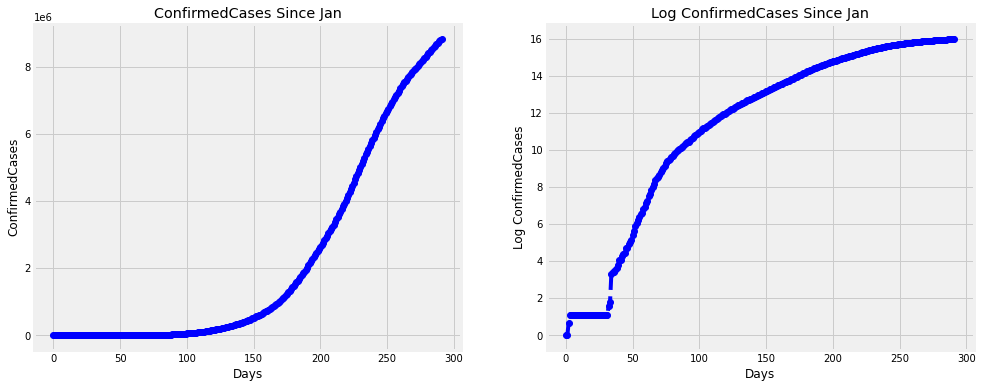

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

x1 = range(0, len(y1))
ax1.plot(x1, y1, 'bo--')
ax1.set_title("ConfirmedCases Since Jan")
ax1.set_xlabel("Days")
ax1.set_ylabel("ConfirmedCases")


x2 = range(0, len(y2))
ax2.plot(x2, y2, 'bo--')
ax2.set_title("Log ConfirmedCases Since Jan")
ax2.set_xlabel("Days")
ax2.set_ylabel("Log ConfirmedCases")

In [12]:
dates=confirmed_total_date.Date
dates

0     2020-01-30
1     2020-01-31
2     2020-02-01
3     2020-02-02
4     2020-02-03
         ...    
287   2020-11-12
288   2020-11-13
289   2020-11-14
290   2020-11-15
291   2020-11-16
Name: Date, Length: 292, dtype: datetime64[ns]

In [13]:
days_in_future = 50
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-50]


In [14]:
start = '1/30/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [15]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(X,y, test_size=0.25, shuffle=False)

In [16]:
# transform data for polynomial regression
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

In [ ]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)

linear_model.fit(poly_X_train_confirmed, y_train_confirmed)


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

In [ ]:
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 1174013.963971785
MSE: 3011444794966.2876


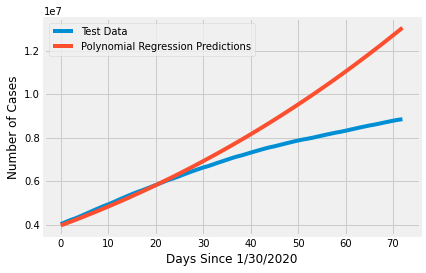

In [ ]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.xlabel('Days Since 1/30/2020')
plt.ylabel('Number of Cases')
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [ ]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Number of Coronavirus Cases in India Over Time', size=30)
    plt.xlabel('Days Since 1/30/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

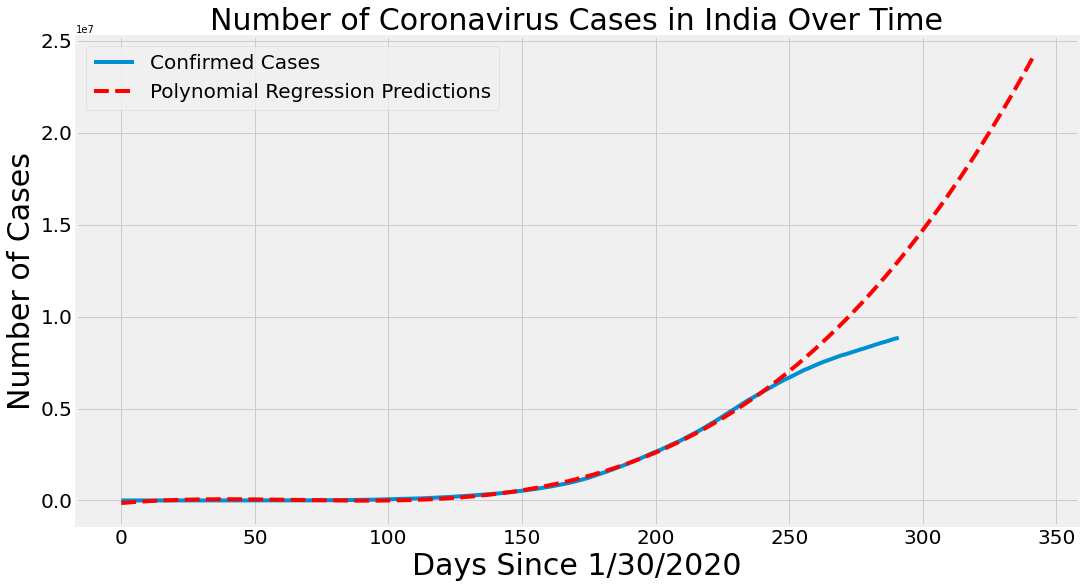

In [ ]:
plot_predictions(adjusted_dates, y, linear_pred, 'Polynomial Regression Predictions', 'red')